In [10]:
import pandas as pd

# Load the data
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

# Merge the datasets on CustomerID
merged_data = pd.merge(transactions, customers, on='CustomerID')

# Display the first few rows of the merged data
merged_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00761,C0199,P022,2024-10-01 05:57:09,4,550.16,137.54,Andrea Jenkins,Europe,2022-12-03
2,T00626,C0199,P079,2024-08-17 12:06:08,2,834.74,417.37,Andrea Jenkins,Europe,2022-12-03
3,T00963,C0199,P008,2024-10-26 00:01:58,2,293.70,146.85,Andrea Jenkins,Europe,2022-12-03
4,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04


In [12]:
from datetime import datetime

# Calculate total spending per customer
total_spending = merged_data.groupby('CustomerID')['TotalValue'].sum().reset_index()
total_spending.columns = ['CustomerID', 'TotalSpending']

# Calculate average transaction value per customer
avg_transaction_value = merged_data.groupby('CustomerID')['TotalValue'].mean().reset_index()
avg_transaction_value.columns = ['CustomerID', 'AvgTransactionValue']

# Calculate number of transactions per customer
num_transactions = merged_data.groupby('CustomerID')['TransactionID'].count().reset_index()
num_transactions.columns = ['CustomerID', 'NumTransactions']

# Merge these features with the customer data
customer_features = pd.merge(customers, total_spending, on='CustomerID')
customer_features = pd.merge(customer_features, avg_transaction_value, on='CustomerID')
customer_features = pd.merge(customer_features, num_transactions, on='CustomerID')

# Convert SignupDate to days since signup
customer_features['SignupDate'] = pd.to_datetime(customer_features['SignupDate'])
current_date = datetime.now()
customer_features['DaysSinceSignup'] = (current_date - customer_features['SignupDate']).dt.days

# Encode Region as categorical data
customer_features = pd.get_dummies(customer_features, columns=['Region'], drop_first=True)

# Drop unnecessary columns
customer_features = customer_features.drop(['CustomerName', 'SignupDate'], axis=1)

# Display the first few rows of the feature-engineered data
customer_features.head()

,CustomerID,TotalSpending,AvgTransactionValue,NumTransactions,DaysSinceSignup,Region_Europe,Region_North America,Region_South America
0,C0001,3354.52,670.904,5,932,False,False,True
1,C0002,1862.74,465.685,4,1079,False,False,False
2,C0003,2725.38,681.345,4,326,False,False,True
3,C0004,5354.88,669.360,8,841,False,False,True
4,C0005,2034.24,678.080,3,896,False,False,False


C:\Users\91949\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\91949\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\91949\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\91949\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

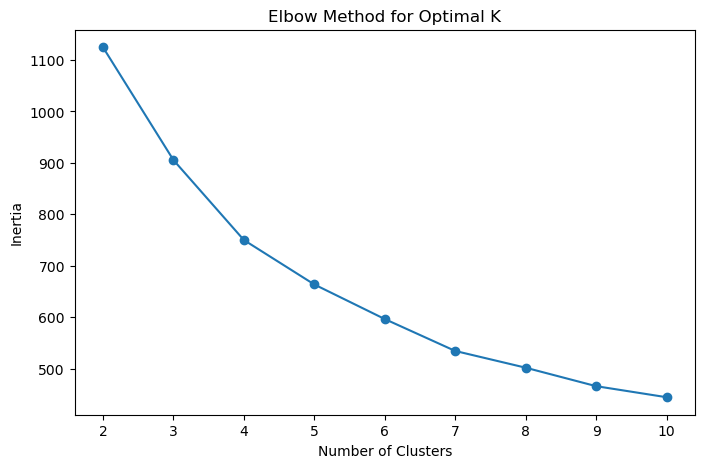

In [13]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features.drop('CustomerID', axis=1))

# Determine the optimal number of clusters using the Elbow Method
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [15]:
# Perform K-Means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(scaled_features)

# Display the first few rows with cluster labels
customer_features.head()

C:\Users\91949\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\91949\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,CustomerID,TotalSpending,AvgTransactionValue,NumTransactions,DaysSinceSignup,Region_Europe,Region_North America,Region_South America,Cluster
0,C0001,3354.52,670.904,5,932,False,False,True,1
1,C0002,1862.74,465.685,4,1079,False,False,False,0
2,C0003,2725.38,681.345,4,326,False,False,True,0
3,C0004,5354.88,669.360,8,841,False,False,True,1
4,C0005,2034.24,678.080,3,896,False,False,False,0


In [16]:
from sklearn.metrics import davies_bouldin_score

# Calculate the DB Index
db_index = davies_bouldin_score(scaled_features, customer_features['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')

Davies-Bouldin Index: 1.3983224965613381


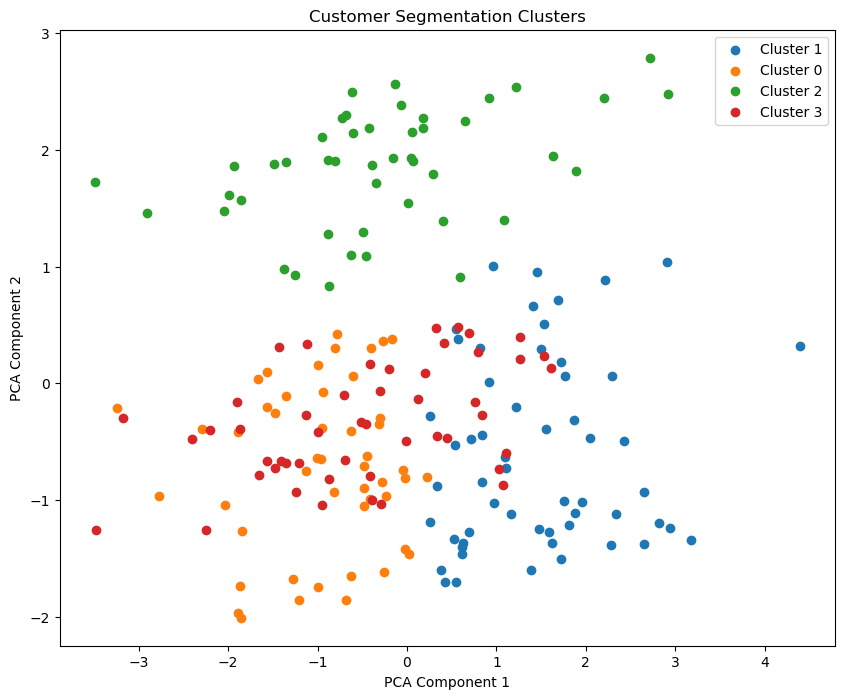

In [17]:
from sklearn.decomposition import PCA

# Reduce dimensionality to 2D using PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Add PCA features to the dataframe
customer_features['PCA1'] = pca_features[:, 0]
customer_features['PCA2'] = pca_features[:, 1]

# Plot the clusters
plt.figure(figsize=(10, 8))
for cluster in customer_features['Cluster'].unique():
    plt.scatter(customer_features[customer_features['Cluster'] == cluster]['PCA1'],
                customer_features[customer_features['Cluster'] == cluster]['PCA2'],
                label=f'Cluster {cluster}')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Customer Segmentation Clusters')
plt.legend()
plt.show()